In [148]:
from __future__ import print_function
import os
import time
import random
import argparse
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
from torchvision.transforms import ToPILImage
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### load project files
import models
from models import weights_init

In [149]:
class args:
	dataRoot='./posters_resized'
	workers=12
	batchSize=128
	imageSize=64
	nz=100
	ngf=64
	ndf=64
	niter=80
	lr=0.0002
	beta1=0.5
	#cuda
	ngpu=1
	netG= ''
	netD= ''
	outDir='./results'
	model=1
	d_labelSmooth=0.1      # 0.25 from imporved-GANpaper
	n_extra_layers_d=0
	n_extra_layers_g=1     #in the sense that generator should be more powerful
	binary = False

In [150]:
try:
    os.makedirs(args.outDir)
except OSError:
    pass


In [151]:
args.manualSeed = random.randint(1,10000) # fix seed, a scalar
random.seed(args.manualSeed)
torch.manual_seed(args.manualSeed)


In [152]:
#nc = 3
nc = 8
ngpu = args.ngpu
nz = args.nz
ngf = args.ngf
ndf = args.ndf
n_extra_d = args.n_extra_layers_d
n_extra_g = args.n_extra_layers_g

In [153]:
dataset = dset.ImageFolder(
    root=args.dataRoot,
    transform=transforms.Compose([
            transforms.Scale(args.imageSize),
            # transforms.CenterCrop(args.imageSize),
            transforms.ToTensor(),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)), # bring images to (-1,1)
        ])
)



In [154]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batchSize,
                                         shuffle=True, num_workers=args.workers)

In [313]:
print (images.size())
for image,label in zip(images,labels):
    break
print (image.size())
label

torch.Size([128, 3, 64, 64])
torch.Size([3, 64, 64])


4

In [319]:
new_images = []
for image,label in zip(images,labels):
    a = np.zeros([5,64,64])
    a[label-1] += 1
    new_image = np.concatenate([image.numpy(),a])

    new_images.append(new_image)
np.stack(new_images).shape

(128, 8, 64, 64)

In [322]:
def concat_channel(images,labels):
    new_images = []
    for image,label in zip(images,labels):
        a = np.zeros([5,64,64])
        a[label-1] += 1
        new_image = np.concatenate([image.numpy(),a])
        
        new_images.append(new_image)
        
    new_images = np.stack(new_images)
    return torch.from_numpy(new_images).float()
    

In [323]:
for epoch in range(args.niter):
    for i, data in enumerate(dataloader, 0):
        start_iter = time.time()
        # train with real
        netD.zero_grad()
        images,labels= data[0],data[1]
        print (images.size())
        #images = newconcat(images,labels)
        images = concat_channel(images,labels)
        #data = images,labels
        print (images.size())
        break
    break

torch.Size([128, 3, 64, 64])
torch.Size([128, 8, 64, 64])


In [ ]:
### for image,label in zip(images,labels):
    count +=1
    #a = np.zeros([5,64,64])
    #a[label-1] +=1
    a = torch.zeros(5,64,64)
    a[label-1].fill_(1)

    image = torch.cat([image,a],0)
    #print (image.size())
    #new_images.append(image)

    try:
        final_tensor = torch.stack([final_tensor,image],0)
    except:
        final_tensor = image

#return torch.from_numpy(np.array(new_images)).float()
    print ("final tensor :", final_tensor.size())

In [240]:
def concat_channel(images,labels):
    count = 0
    for image,label in zip(images,labels):
        count +=1
        #a = np.zeros([5,64,64])
        #a[label-1] +=1
        a = torch.zeros(5,64,64)
        a[label-1].fill_(1)
        
        image = torch.cat([image,a],0)
        #print (image.size())
        #new_images.append(image)
        
        try:
            final_tensor = torch.stack([final_tensor,image],0)
        except:
            final_tensor = image
        
    #return torch.from_numpy(np.array(new_images)).float()
        print ("final tensor :", final_tensor.size())
    return final_tensor

In [241]:
def newconcat(images, labels):
    y_onehot = torch.FloatTensor(128, 5)
    y_onehot = y_onehot.zero_().scatter_(1, labels.unsqueeze(1)-1, 1)
    y_onehot = torch.unsqueeze(torch.unsqueeze(y_onehot, 2),3).expand(128, 5, 64, 64)
    
    return torch.cat((images, y_onehot),1)

In [242]:
def newconcat_noise(noise, labels):
    y_onehot = torch.FloatTensor(128, 5)
    y_onehot = y_onehot.zero_().scatter_(1, labels.unsqueeze(1)-1, 1)
    #y_onehot = torch.unsqueeze(torch.unsqueeze(y_onehot, 2),3).expand(128, 5, 64, 64)
    
    return torch.cat((noise, y_onehot),1)

In [243]:
for i, data in enumerate(dataloader, 0):
    image, label = data
    #print(label)
    print (image.size())
    new_image = concat_channel(image,label)
    print (new_image.size())
    break

torch.Size([128, 3, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])
final tensor : torch.Size([8, 64, 64])
final tensor : torch.Size([2, 8, 64, 64])

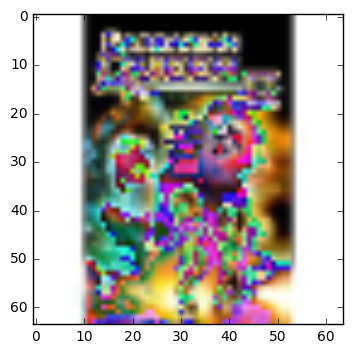

In [239]:
for i, data in enumerate(dataloader, 0):

    #print(type( data[0][0]) )
    image, label = data
    def show(img):
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1,2,0)), )#interpolation='nearest')
    show(image[4])
    
    break

In [218]:
# load models
if args.model == 0:
    netG = models._netG_0(ngpu, nz, 3, ngf)
    netD = models._netD_0(ngpu, nz, nc, ndf)
elif args.model == 1:
    netG = models._netG_1(ngpu, nz+5, 3, ngf, n_extra_g)
    netD = models._netD_1(ngpu, nz, nc, ndf, n_extra_d)
elif args.model == 2:
    netG = models._netG_2(ngpu, nz, 3, ngf)
    netD = models._netD_2(ngpu, nz, nc, ndf)

netG.apply(weights_init)
if args.netG != '':
    netG.load_state_dict(torch.load(args.netG))
print(netG)

netD.apply(weights_init)
if args.netD != '':
    netD.load_state_dict(torch.load(args.netD))
print(netD)

_netG_1 (
  (main): Sequential (
    (0): ConvTranspose2d(105, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (2): LeakyReLU (0.2, inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (5): LeakyReLU (0.2, inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (8): LeakyReLU (0.2, inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (11): LeakyReLU (0.2, inplace)
    (extra-layers-0.64.conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (extra-layers-0.64.batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  

In [219]:
criterion = nn.BCELoss()
criterion_MSE = nn.MSELoss()

input = torch.FloatTensor(args.batchSize, nc, args.imageSize, args.imageSize)
noise = torch.FloatTensor(args.batchSize, nz, 1, 1)
if args.binary:
    bernoulli_prob = torch.FloatTensor(args.batchSize, nz, 1, 1).fill_(0.5)
    fixed_noise = torch.bernoulli(bernoulli_prob)
else:
    fixed_noise = torch.FloatTensor(args.batchSize, nz, 1, 1).normal_(0, 1)
label = torch.FloatTensor(args.batchSize)
real_label = 1
fake_label = 0


input = Variable(input)
label = Variable(label)
noise = Variable(noise)
fixed_noise = Variable(fixed_noise)


# setup argsimizer
optimizerD = optim.Adam(netD.parameters(), lr=args.lr, betas=(args.beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=args.lr, betas=(args.beta1, 0.999))

In [270]:
for epoch in range(args.niter):
    for i, data in enumerate(dataloader, 0):
        start_iter = time.time()
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        images,labels= data[0],data[1]      
        images = newconcat(data[0],data[1])
        data = images,labels

        
        real_cpu = images
        #print (real_cpu.size())
        batch_size = args.batchSize

        input.data.resize_(real_cpu.size()).copy_(real_cpu)
        #print(label)
        label.data.resize_(batch_size).fill_(real_label - args.d_labelSmooth) # use smooth label for discriminator
        #print( input.size() )
        output = netD(input)
        print (output.size())
        print (label.size())
        
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.data.mean()
        
        # train with fake
        noise.data.resize_(batch_size, nz, 1, 1)
        if args.binary:
            bernoulli_prob.resize_(noise.data.size())
            noise.data.copy_(2*(torch.bernoulli(bernoulli_prob)-0.5))
        else:
            noise.data.normal_(0, 1)

        noise = Variable(newconcat_noise(noise.data,labels))

        fake,_ = netG(noise)
        fake = Variable(newconcat(fake.data,labels))

        
        label.data.fill_(fake_label)
        output = netD(fake.detach()) # add ".detach()" to avoid backprop through G

        errD_fake = criterion(output, label)
        errD_fake.backward() # gradients for fake/real will be accumulated
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step() # .step() can be called once the gradients are computed

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.data.fill_(real_label) # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward(retain_variables=True) # True if backward through the graph for the second time
        if args.model == 2: # with z predictor
            errG_z = criterion_MSE(z_prediction, noise)
            errG_z.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()
        
        end_iter = time.time()
        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f Elapsed %.2f s'
              % (epoch, args.niter, i, len(dataloader),
                 errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2, end_iter-start_iter))
        if i % 100 == 0:
            # the first 64 samples from the mini-batch are saved.
            real_cpu
            vutils.save_image(real_cpu[0:64,:3,:,:],
                    '%s/real_samples.png' % args.outDir, nrow=8)
            fake = netG(Variable(newconcat_noise(fixed_noise.data,labels)))
            vutils.save_image(fake.data[0:64,:3,:,:],
                    '%s/fake_samples_epoch_%03d.png' % (args.outDir, epoch), nrow=8)
    if epoch % 1 == 0:
        # do checkpointing
        torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (args.outDir, epoch))
        torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (args.outDir, epoch))


torch.Size([128, 1])
torch.Size([128])


ValueError: too many values to unpack

In [224]:
real_cpu[0:64,:3,:,:]

torch.Size([128, 8, 64, 64])

In [221]:
for i, data in enumerate(dataloader, 0):
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [229]:
noise[0]

Variable containing:
( 0 ,.,.) = 
  0.5626

( 1 ,.,.) = 
 -0.6843

( 2 ,.,.) = 
 -0.1892

( 3 ,.,.) = 
 -0.3209

( 4 ,.,.) = 
  0.4354

( 5 ,.,.) = 
  0.5787

( 6 ,.,.) = 
  0.6910

( 7 ,.,.) = 
  0.8287

( 8 ,.,.) = 
 -1.6580

( 9 ,.,.) = 
  0.1808

(10 ,.,.) = 
  1.8345

(11 ,.,.) = 
 -0.8673

(12 ,.,.) = 
  0.6403

(13 ,.,.) = 
 -0.3982

(14 ,.,.) = 
 -0.3538

(15 ,.,.) = 
 -0.2086

(16 ,.,.) = 
  1.3363

(17 ,.,.) = 
  0.8491

(18 ,.,.) = 
 -1.6546

(19 ,.,.) = 
 -0.5588

(20 ,.,.) = 
 -0.0723

(21 ,.,.) = 
  0.9351

(22 ,.,.) = 
  1.6669

(23 ,.,.) = 
  2.1554

(24 ,.,.) = 
 -0.2282

(25 ,.,.) = 
  0.6364

(26 ,.,.) = 
 -0.2007

(27 ,.,.) = 
  0.2597

(28 ,.,.) = 
  0.0702

(29 ,.,.) = 
  0.1876

(30 ,.,.) = 
 -0.1290

(31 ,.,.) = 
  0.5052

(32 ,.,.) = 
 -0.9317

(33 ,.,.) = 
 -0.2785

(34 ,.,.) = 
 -3.4393

(35 ,.,.) = 
  0.3969

(36 ,.,.) = 
  0.1456

(37 ,.,.) = 
 -0.6237

(38 ,.,.) = 
  0.6656

(39 ,.,.) = 
  0.5375

(40 ,.,.) = 
 -0.8241

(41 ,.,.) = 
 -0.6770

(42 ,.,.) = 


In [230]:
labels[0]

4

In [331]:
args.manualSeed = random.randint(1,10000) # fix seed, a scalar
random.seed(args.manualSeed)
torch.manual_seed(args.manualSeed)


# In[152]:

#nc = 3
nc = 8
ngpu = args.ngpu
nz = args.nz
ngf = args.ngf
ndf = args.ndf
n_extra_d = args.n_extra_layers_d
n_extra_g = args.n_extra_layers_g


# In[153]:

dataset = dset.ImageFolder(
    root=args.dataRoot,
    transform=transforms.Compose([
            transforms.Scale(args.imageSize),
            # transforms.CenterCrop(args.imageSize),
            transforms.ToTensor(),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)), # bring images to (-1,1)
        ])
)



# In[154]:

dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batchSize,
                                         shuffle=True, num_workers=args.workers)


# In[155]:

def concat_channel(images,labels):
    new_images = []
    for image,label in zip(images,labels):
        a = np.zeros([5,64,64])
        a[label-1] += 1
        new_image = np.concatenate([image.numpy(),a])
        
        new_images.append(new_image)
        
    new_images = np.stack(new_images)
    return torch.from_numpy(new_images).float()


# In[179]:

def newconcat(images, labels):
    y_onehot = torch.FloatTensor(args.batchSize, 5)
    #print (label.unsqueeze(1).size())
    try:
        y_onehot.zero_().scatter_(1, labels.unsqueeze(1)-1, 1)
    except:
        y_onehot.zero_().scatter_(1, labels-1, 1)
    y_onehot = torch.unsqueeze(torch.unsqueeze(y_onehot, 2),3).expand(args.batchSize, 5, args.imageSize, args.imageSize)

    return torch.cat((images, y_onehot),1)


# In[192]:

def newconcat_noise(images, labels):
    y_onehot = torch.FloatTensor(args.batchSize, 5)
    #print (label.unsqueeze(1).size())
    try:
        y_onehot.zero_().scatter_(1, labels.unsqueeze(1)-1, 1)
    except:
        y_onehot.zero_().scatter_(1, labels-1, 1)
    #y_onehot = torch.unsqueeze(torch.unsqueeze(y_onehot, 2),3).expand(args.batchSize, 5, args.imageSize, args.imageSize)

    return torch.cat((images, y_onehot),1)









# In[218]:

# load models
if args.model == 0:
    netG = models._netG_0(ngpu, nz, 3, ngf)
    netD = models._netD_0(ngpu, nz, nc, ndf)
elif args.model == 1:
    netG = models._netG_1(ngpu, 105, 3, ngf, n_extra_g)
    netD = models._netD_1(ngpu, 105, nc, ndf, n_extra_d)
elif args.model == 2:
    netG = models._netG_2(ngpu, nz, 3, ngf)
    netD = models._netD_2(ngpu, nz, nc, ndf)

netG.apply(weights_init)
if args.netG != '':
    netG.load_state_dict(torch.load(args.netG))
print(netG)

netD.apply(weights_init)
if args.netD != '':
    netD.load_state_dict(torch.load(args.netD))
print(netD)


# In[219]:

criterion = nn.BCELoss()
criterion_MSE = nn.MSELoss()

input = torch.FloatTensor(args.batchSize, nc, args.imageSize, args.imageSize)
noise = torch.FloatTensor(args.batchSize, nz, 1, 1)
if args.binary:
    bernoulli_prob = torch.FloatTensor(args.batchSize, nz, 1, 1).fill_(0.5)
    fixed_noise = torch.bernoulli(bernoulli_prob)
else:
    fixed_noise = torch.FloatTensor(args.batchSize, nz, 1, 1).normal_(0, 1)
label = torch.FloatTensor(args.batchSize)
real_label = 1
fake_label = 0


input = Variable(input)
label = Variable(label)
noise = Variable(noise)
fixed_noise = Variable(fixed_noise)


# setup argsimizer
optimizerD = optim.Adam(netD.parameters(), lr=args.lr, betas=(args.beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=args.lr, betas=(args.beta1, 0.999))


# In[220]:

for epoch in range(args.niter):
    for i, data in enumerate(dataloader, 0):
        start_iter = time.time()
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        images,labels= data[0],data[1]      
        images = concat_channel(data[0],data[1])
        data = images,labels

        
        real_cpu = images
        #print (real_cpu.size())
        batch_size = args.batchSize

        input.data.resize_(real_cpu.size()).copy_(real_cpu)
        #print(label)
        label.data.resize_(batch_size).fill_(real_label - args.d_labelSmooth) # use smooth label for discriminator
        #print( input.size() )
        output = netD(input)

        #print (output.size())
        #print (label.size())
        
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.data.mean()
        
        # train with fake
        noise.data.resize_(batch_size, nz, 1, 1)
        if args.binary:
            bernoulli_prob.resize_(noise.data.size())
            noise.data.copy_(2*(torch.bernoulli(bernoulli_prob)-0.5))
        else:
            noise.data.normal_(0, 1)

        noise = Variable(newconcat_noise(noise.data,labels))

        fake = netG(noise)
        fake = Variable(newconcat(fake.data,labels))

        
        label.data.fill_(fake_label)
        output = netD(fake.detach()) # add ".detach()" to avoid backprop through G

        errD_fake = criterion(output, label)
        errD_fake.backward() # gradients for fake/real will be accumulated
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step() # .step() can be called once the gradients are computed

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.data.fill_(real_label) # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward(retain_variables=True) # True if backward through the graph for the second time
        if args.model == 2: # with z predictor
            errG_z = criterion_MSE(z_prediction, noise)
            errG_z.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()
        
        end_iter = time.time()
        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f Elapsed %.2f s'
              % (epoch, args.niter, i, len(dataloader),
                 errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2, end_iter-start_iter))
        if i % 100 == 0:
            # the first 64 samples from the mini-batch are saved.
            real_cpu
            vutils.save_image(real_cpu[0:64,:3,:,:],
                    '%s/real_samples.png' % args.outDir, nrow=8)
            fake = netG(Variable(newconcat_noise(fixed_noise.data,labels)))
            vutils.save_image(fake.data[0:64,:3,:,:],
                    '%s/fake_samples_epoch_%03d.png' % (args.outDir, epoch), nrow=8)
    if epoch % 1 == 0:
        # do checkpointing
        torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (args.outDir, epoch))
        torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (args.outDir, epoch))



_netG_1 (
  (main): Sequential (
    (0): ConvTranspose2d(105, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (2): LeakyReLU (0.2, inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (5): LeakyReLU (0.2, inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (8): LeakyReLU (0.2, inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (11): LeakyReLU (0.2, inplace)
    (extra-layers-0.64.conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (extra-layers-0.64.batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  

Process Process-1599:
Process Process-1605:
Process Process-1598:
Process Process-1607:
Process Process-1601:
Traceback (most recent call last):
Process Process-1597:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-1608:
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process Process-1603:
Traceback (most recent call last):
Process Process-1602:
Process Process-1606:
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "//anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "//anaconda/

KeyboardInterrupt: 